## EDA - Caso práctico
### Pesca - Desembarques de capturas marítimas

Datos correspondientes al desembarque de capturas marítimas por flota, puerto, especie y mes, para el período Enero 2010 a 2018 la actualidad.

Fuente: https://datos.gob.ar/ar/dataset/agroindustria-pesca---desembarques-capturas-maritimas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Bs. As. es ~70% de los datos. Lo excluyo para analizar el resto de los datos. 
df = pd.read_csv('../datasets/captura-puerto-flota-2010-2018.csv', na_values='sin especificar', encoding='ISO-8859-1')
df = df[df['provincia']!='Buenos Aires']
df.head(10)

,fecha,flota,puerto,provincia,provincia_id,departamento,departamento_id,latitud,longitud,categoria,especie,especie_agrupada,captura
0,2010-01,Costeros,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,386114
1,2010-01,Costeros,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Pez gallo,otras especies,4367
2,2010-01,Costeros,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Rayas nep,Rayas (sin V. Cost),13
3,2010-01,Rada o ría,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,48218
4,2010-01,Rada o ría,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,935
5,2010-01,Costeros,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Crustáceos,Centolla,Centolla,6
6,2010-01,Costeros,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Peces,Merluza hubbsi,Merluza hubbsi S41,73639
7,2010-01,Costeros,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Peces,Otras especies de peces,otras especies,6087
8,2010-01,Costeros,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Peces,Rayas nep,Rayas (sin V. Cost),16641
9,2010-01,Rada o ría,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Crustáceos,Centolla,Centolla,62087


In [3]:
df.describe()

,provincia_id,departamento_id,latitud,longitud,captura
count,12945.000000,12945.000000,12857.000000,12857.000000,1.294500e+04
mean,54.385323,54434.982542,-44.040348,-65.716238,8.188268e+04
std,23.587891,23603.500904,4.121942,1.195328,5.495392e+05
min,26.000000,26007.000000,-54.869566,-68.413519,1.000000e+00
25%,26.000000,26021.000000,-45.862528,-65.911745,2.860000e+02
50%,62.000000,62077.000000,-42.723398,-65.033620,1.616000e+03
75%,62.000000,62077.000000,-40.725698,-64.934194,1.004700e+04
max,99.000000,99999.000000,-40.725698,-64.883536,1.160318e+07


In [4]:
df.shape

(12945, 13)

In [5]:
# Contar la proporción de valores nulos en cada columna
df.isna().sum()  

fecha                0
flota                0
puerto               0
provincia           88
provincia_id         0
departamento        88
departamento_id      0
latitud             88
longitud            88
categoria            0
especie              0
especie_agrupada     0
captura              0
dtype: int64

<Axes: >

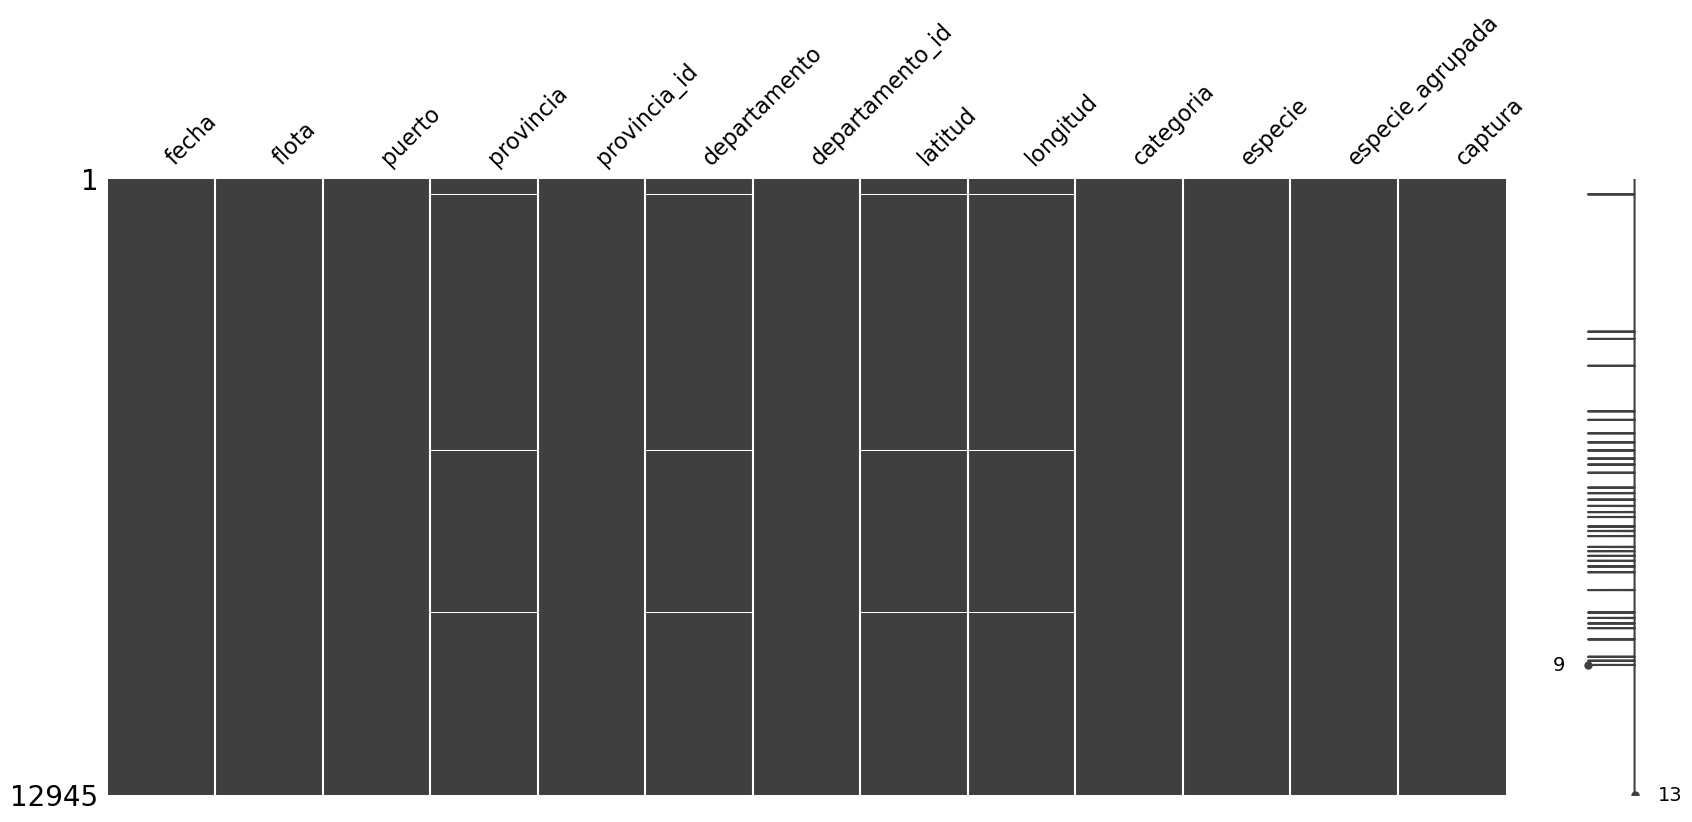

In [6]:
# Matriz de valores faltantes
msno.matrix(df, figsize=(20,8))

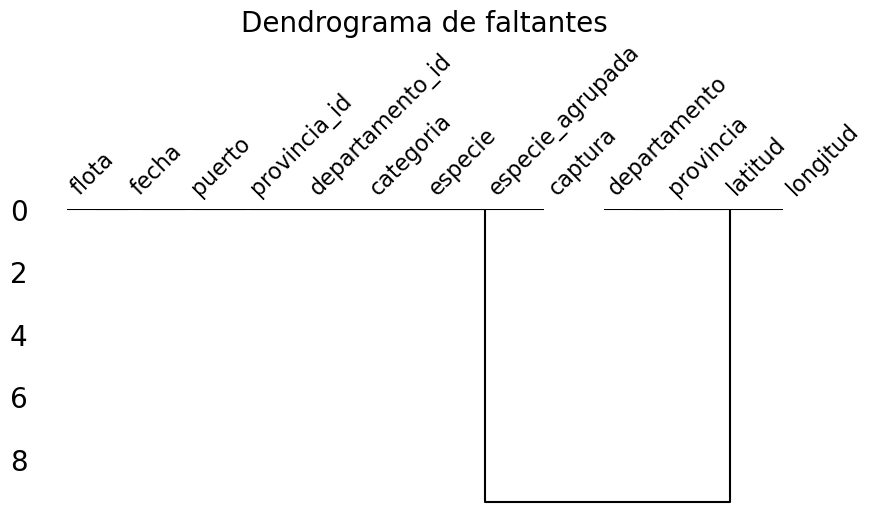

In [7]:
msno.dendrogram(df, figsize=(10,4))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

## Exploramos variables categóricas

In [8]:
df['provincia'].unique()

array(['Chubut', 'Santa Cruz', 'Río Negro', 'Tierra del Fuego', nan],
      dtype=object)

In [9]:
df['categoria'].unique()

array(['Peces', 'Crustáceos', 'Moluscos'], dtype=object)

In [10]:
df['especie_agrupada'].unique()

array(['Merluza hubbsi S41', 'otras especies', 'Rayas (sin V. Cost)',
       'Centolla', 'Langostino', 'Calamar Illex', 'Abadejo',
       'Merluza de cola', 'Anchoíta', 'Merluza negra', 'Variado costero',
       'Polaca', 'Merluza hubbsi GSM', 'Vieira (callos)',
       'Merluza hubbsi N41 CTMFM', 'Merluza hubbsi N41 ZEEA'],
      dtype=object)

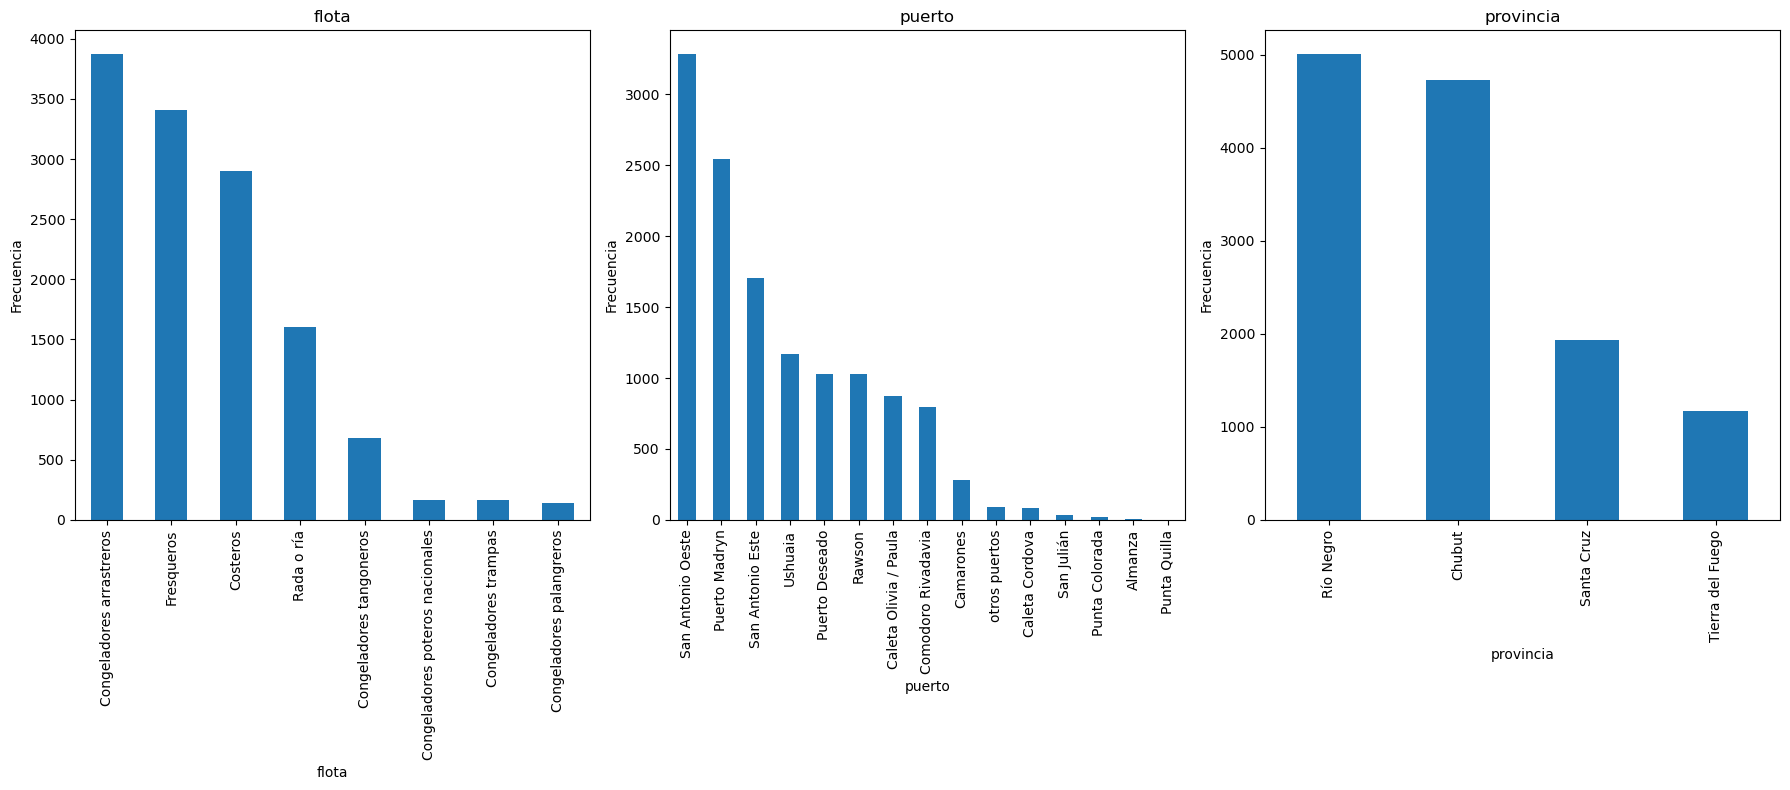

In [11]:
cat_vars = ['flota', 'puerto', 'provincia']

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for ax, col in zip(axes.ravel(), cat_vars):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


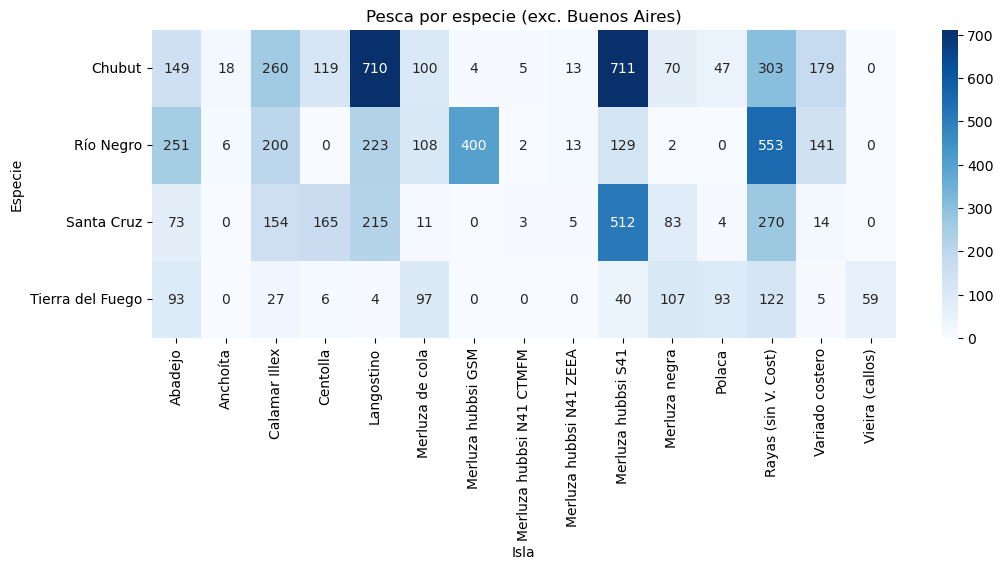

In [12]:
df_simple = df[(df['especie_agrupada']!='otras especies')]

plt.figure(figsize=(12, 4))
cross_tab = pd.crosstab(df_simple['provincia'], df_simple['especie_agrupada'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Pesca por especie (exc. Buenos Aires)')
plt.xlabel('Isla')
plt.ylabel('Especie')
plt.show()

## Exploramos la variable numérica Captura

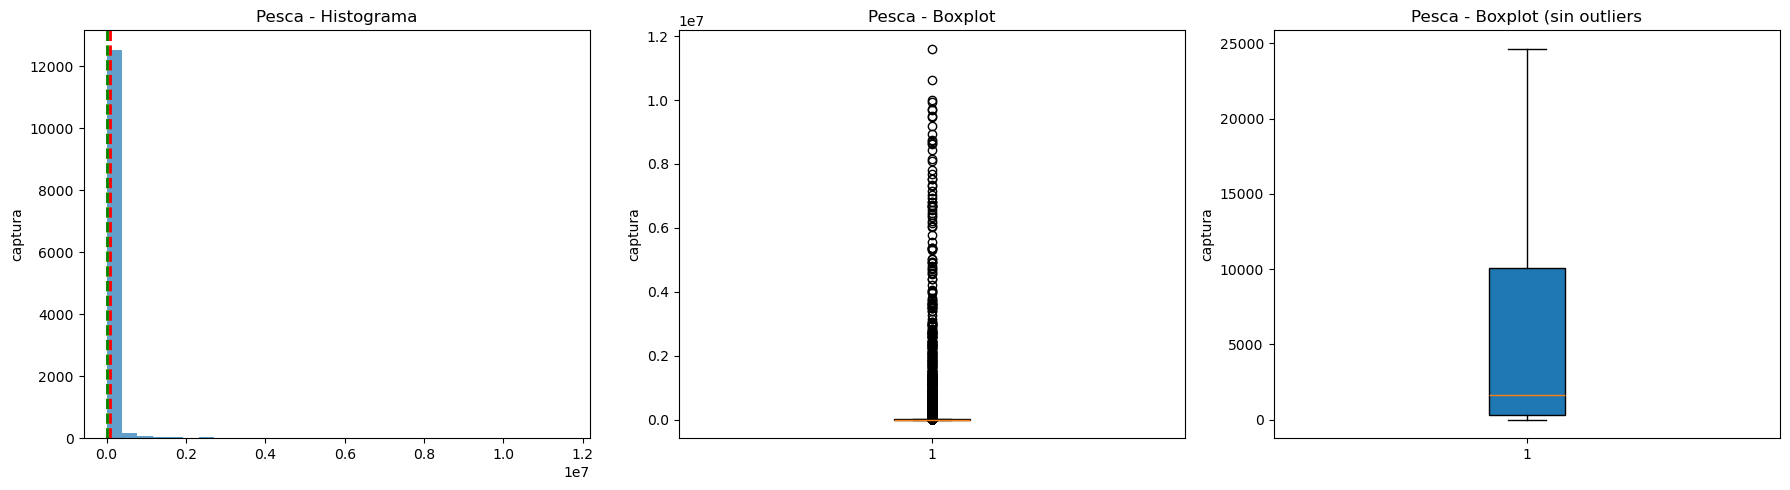

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Histograma ---
axes[0].hist(df['captura'], bins=30, alpha=0.7)
axes[0].axvline(df['captura'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
axes[0].axvline(df['captura'].mean(), color='red', ls='--', lw=2, label='Media')
axes[0].axvline(df['captura'].median(), color='green', ls='--', lw=2, label='Mediana')
axes[0].set_title('Pesca - Histograma')
axes[0].set_ylabel('captura')

# --- Boxplot ---
axes[1].boxplot(df['captura'], vert=True, patch_artist=True)
axes[1].set_title('Pesca - Boxplot')
axes[1].set_ylabel('captura')


# --- Boxplot ---
axes[2].boxplot(df['captura'], vert=True, patch_artist=True, showfliers=False)
axes[2].set_title('Pesca - Boxplot (sin outliers')
axes[2].set_ylabel('captura')

plt.tight_layout()
plt.show()


In [14]:
df['captura'].quantile([0.5, 0.75, 0.9, 0.95, 0.99])

0.50       1616.00
0.75      10047.00
0.90      53086.40
0.95     175392.40
0.99    2120195.96
Name: captura, dtype: float64

## Exploramos la relación de la captura con las distintas variables categóricas

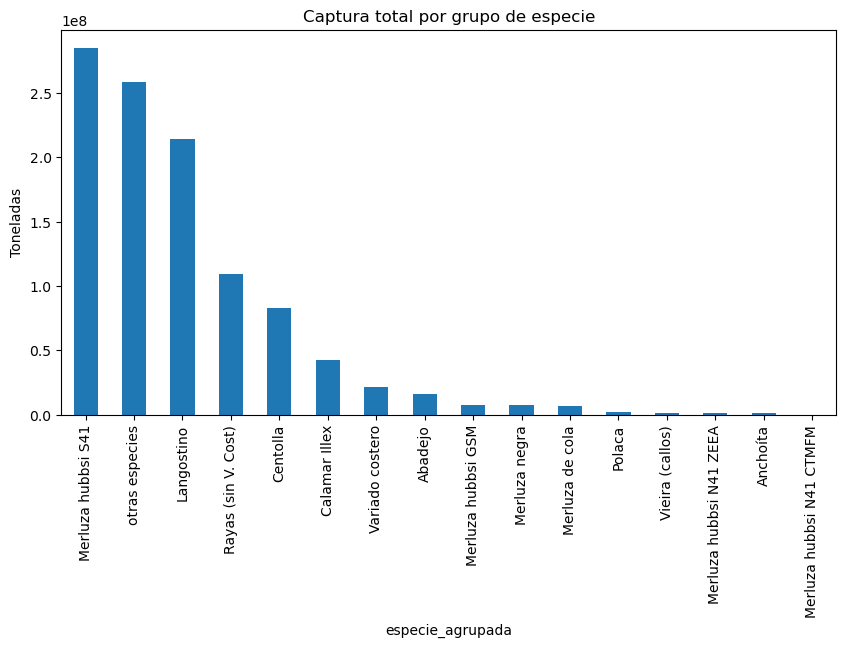

In [15]:
df.groupby('especie_agrupada')['captura'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Captura total por grupo de especie')
plt.ylabel('Toneladas')
plt.xticks(rotation=90)
plt.show()


#### Analizamos solo el grupo de especie Merluza hubbsi S41.

In [16]:
df_merluza = df[df['especie_agrupada']=='Merluza hubbsi S41'].copy()
df_merluza['fecha'] = pd.to_datetime(df_merluza['fecha'], format='%Y-%m', errors='coerce')
df_merluza['anio'] = df_merluza['fecha'].dt.year

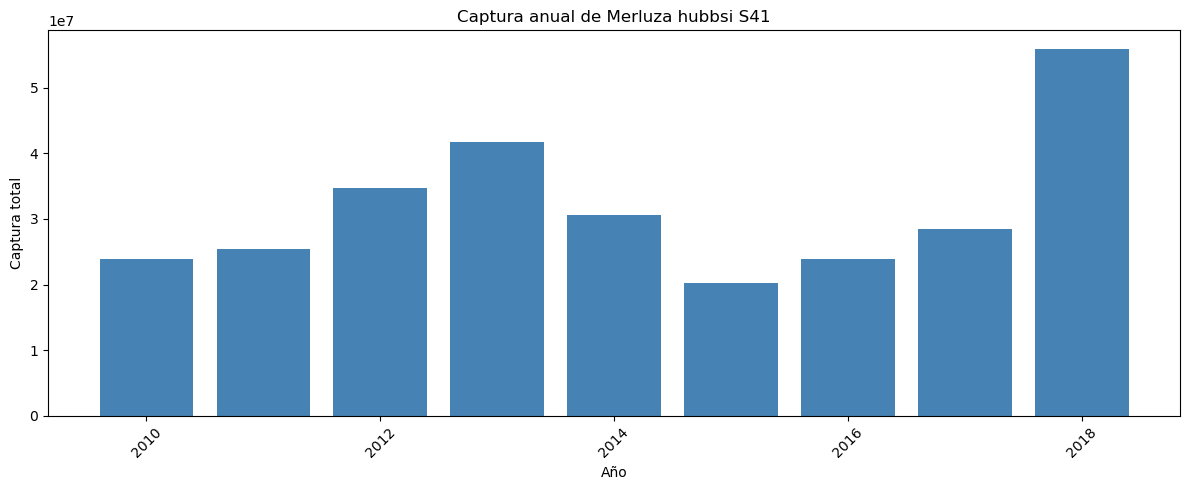

In [17]:
# agrupa por año
captura_anual = df_merluza.groupby('anio')['captura'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.bar(captura_anual['anio'], captura_anual['captura'], color='steelblue')
plt.title('Captura anual de Merluza hubbsi S41')
plt.xlabel('Año')
plt.ylabel('Captura total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ahora discrimino por puerto. Dónde se captura más esta especie? Fue siempre igual a lo largo de los años?

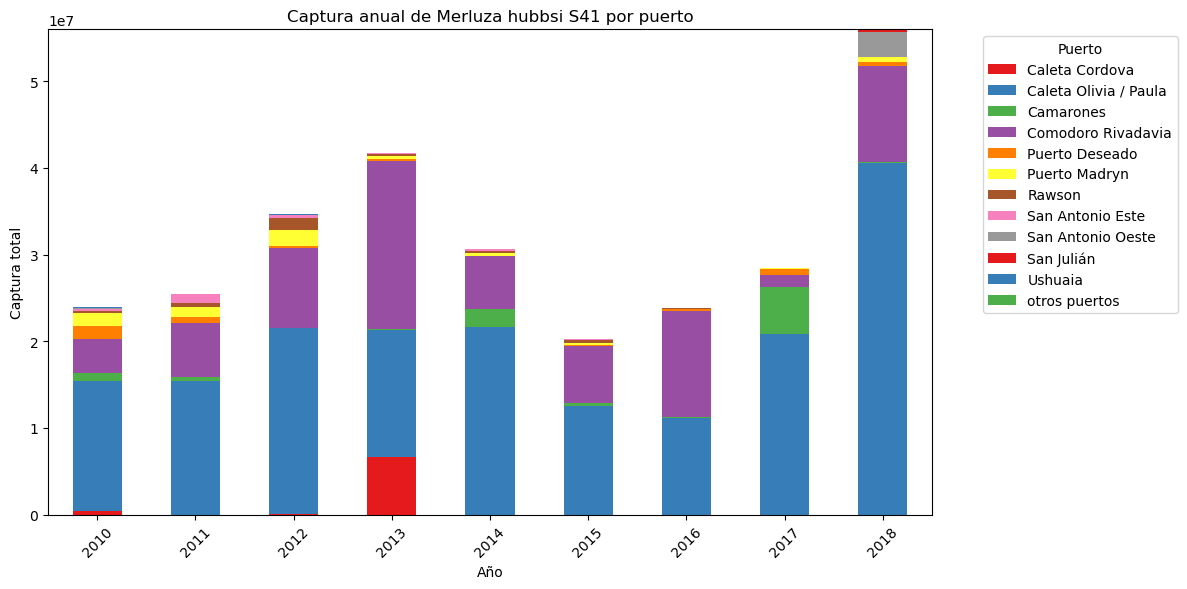

In [18]:
# pivot para barras apiladas
pivot = df_merluza.groupby(['anio', 'puerto'])['captura'].sum().unstack(fill_value=0)

palette = sns.color_palette("Set1", n_colors=pivot.shape[1])
ax = pivot.plot(kind='bar', stacked=True, figsize=(12,6), color=palette)

ax.set_title('Captura anual de Merluza hubbsi S41 por puerto', fontsize=12)
ax.set_xlabel('Año')
ax.set_ylabel('Captura total')
ax.set_xticklabels(pivot.index, rotation=45)
ax.legend(title='Puerto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Exploramos/visualizamos ahora solo los crustáceos

In [19]:
df_crust = df[df['categoria']=='Crustáceos'].copy()
df_crust

,fecha,flota,puerto,provincia,provincia_id,departamento,departamento_id,latitud,longitud,categoria,especie,especie_agrupada,captura
3,2010-01,Rada o ría,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,48218
5,2010-01,Costeros,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Crustáceos,Centolla,Centolla,6
9,2010-01,Rada o ría,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Crustáceos,Centolla,Centolla,62087
10,2010-01,Rada o ría,Caleta Olivia / Paula,Santa Cruz,78,Deseado,78014,-46.436049,-67.514904,Crustáceos,Langostino,Langostino,5655
15,2010-01,Congeladores tangoneros,Camarones,Chubut,26,Florentino Ameghino,26028,-44.798941,-65.709705,Crustáceos,Langostino,Langostino,64669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41303,2018-12,Rada o ría,San Antonio Este,Río Negro,62,San Antonio,62077,-40.798750,-64.883536,Crustáceos,Langostino,Langostino,380
41304,2018-12,Costeros,San Antonio Oeste,Río Negro,62,San Antonio,62077,-40.725698,-64.934194,Crustáceos,Langostino,Langostino,1679
41313,2018-12,Rada o ría,San Antonio Oeste,Río Negro,62,San Antonio,62077,-40.725698,-64.934194,Crustáceos,Langostino,Langostino,120
41326,2018-12,Fresqueros,San Julián,Santa Cruz,78,Magallanes,78042,-49.300594,-67.721019,Crustáceos,Centolla,Centolla,451


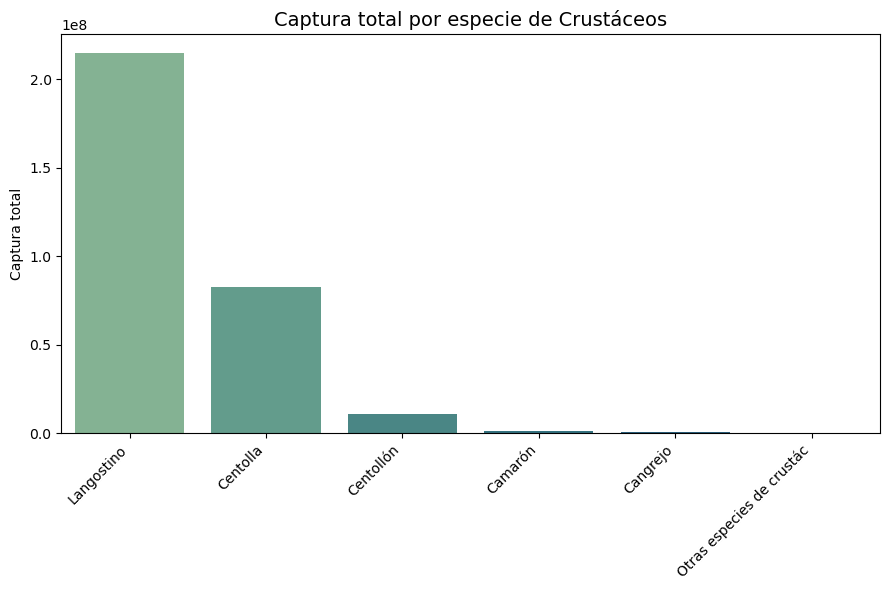

In [20]:
# preparamos los datos
captura_especie = (
    df_crust.groupby('especie')['captura']
    .sum()
    .reset_index()
    .sort_values('captura', ascending=False)
)

plt.figure(figsize=(9,6))
ax = sns.barplot(data=captura_especie, x='especie', y='captura', hue='especie', palette='crest', order=captura_especie['especie'])

ax.set_title('Captura total por especie de Crustáceos', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Captura total')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()


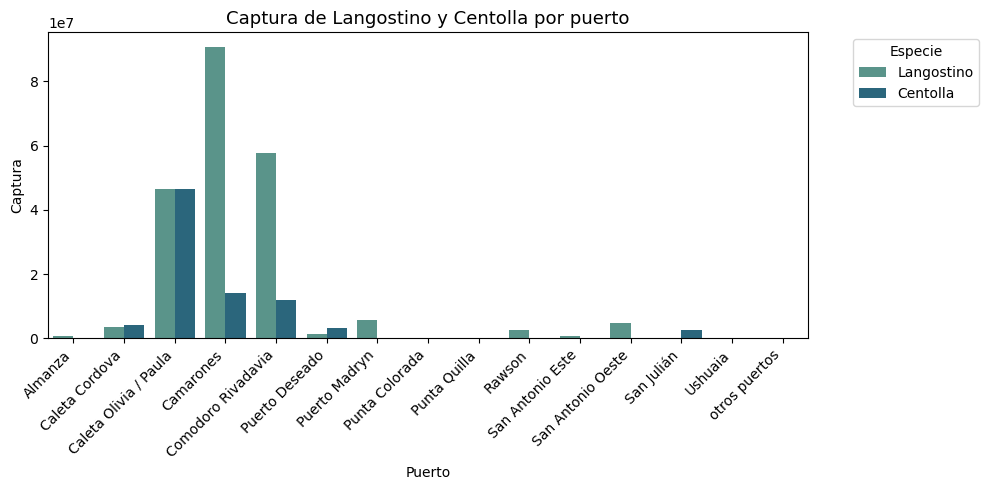

In [21]:
# Filtro solo langostino y centolla
df_lc = df_crust[df_crust['especie'].isin(['Langostino', 'Centolla'])]

# Agrupo por puerto y especie
captura_puerto = (
    df_lc.groupby(['puerto', 'especie'])['captura']
    .sum()
    .reset_index()
)

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(data=captura_puerto, x='puerto', y='captura', hue='especie', palette='crest')

plt.title('Captura de Langostino y Centolla por puerto', fontsize=13)
plt.xlabel('Puerto')
plt.ylabel('Captura')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Especie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()